In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras import models, layers

## Loading the data set

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

C:\Users\142935\Anaconda3\envs\ds\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\142935\Anaconda3\envs\ds\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [5]:
train_data.shape

(8982,)

In [6]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [7]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [8]:
train_labels.shape

(8982,)

In [9]:
test_data.shape

(2246,)

In [10]:
test_labels.shape

(2246,)

## Decoding newswire back

In [11]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for key, value in word_index.items()])
decode_review = ' '.join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

In [12]:
decode_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [13]:
train_labels[0]

3

## Preparing the data

In [14]:
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [15]:
# Dimensions is 46 as there are 46 class labels / output class for classification
def to_one_hot_labels(labels, dimensions=46):
    results = np.zeros((len(labels), dimensions))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results


In [16]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_one_hot_labels(train_labels)
one_hot_test_labels = to_one_hot_labels(test_labels)

## Instead of using our own custom one hot encoder, we can use the built in keras function to do it
one_hot_train_labels = to_categorical(train_labels) 
one_hot_test_labels = to_categorical(test_labels)


In [17]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building Our Network

In [18]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

## Train Test Validation

In [19]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [39]:
partial_x_train.shape

(7982, 10000)

## Train the Model

history = model.fit(partial_x_train, partial_y_train, epochs= 20, batch_size= 512, validation_data=(x_val, y_val))

In [38]:
from numba import cuda

cuda.select_device(0)
cuda.close()

In [22]:
def plot_loss(history, epochs, plt):
    history_dict = history.history
    loss_values = history_dict.get("loss")
    val_loss_values = history_dict.get("val_loss")

    epochs_to_plot = range(1, epochs + 1)
    plt.plot(epochs_to_plot, loss_values, "bo", label="Training Loss")
    plt.plot(epochs_to_plot, val_loss_values, "b", label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

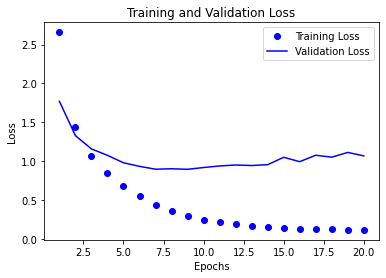

In [24]:
plot_loss(history, 20, plt)

In [25]:
def plot_accuracy(history, epochs, plt):
    history_dict = history.history
    acc_values = history_dict.get("accuracy")
    val_acc_values = history_dict.get("val_accuracy")

    epochs_to_plot = range(1, epochs + 1)
    plt.plot(epochs_to_plot, acc_values, "bo", label="Training Accuracy")
    plt.plot(epochs_to_plot, val_acc_values, "b", label="Validation Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

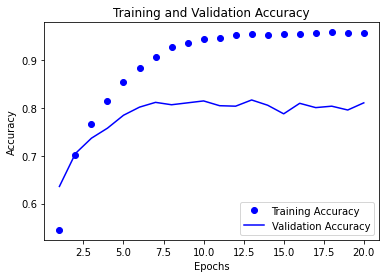

In [27]:
plot_accuracy(history, 20, plt)

## As the model beguns to overfitt from 9th epoch, let us retrain the model til 9 epochs

In [20]:
model.fit(partial_x_train, partial_y_train, epochs= 9, batch_size= 512, validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 0s 23ms/step - loss: 2.5863 - accuracy: 0.5276 - val_loss: 1.6940 - val_accuracy: 0.6550
Epoch 2/9
16/16 [==============================] - 0s 13ms/step - loss: 1.3942 - accuracy: 0.7101 - val_loss: 1.2844 - val_accuracy: 0.7250
Epoch 3/9
16/16 [==============================] - 0s 13ms/step - loss: 1.0288 - accuracy: 0.7810 - val_loss: 1.1229 - val_accuracy: 0.7440
Epoch 4/9
16/16 [==============================] - 0s 12ms/step - loss: 0.8113 - accuracy: 0.8291 - val_loss: 1.0176 - val_accuracy: 0.8000
Epoch 5/9
16/16 [==============================] - 0s 12ms/step - loss: 0.6431 - accuracy: 0.8686 - val_loss: 0.9547 - val_accuracy: 0.8050
Epoch 6/9
16/16 [==============================] - 0s 13ms/step - loss: 0.5211 - accuracy: 0.8931 - val_loss: 0.9330 - val_accuracy: 0.8030
Epoch 7/9
16/16 [==============================] - 0s 12ms/step - loss: 0.4187 - accuracy: 0.9142 - val_loss: 0.9073 - val_accuracy: 0.8020
Epoch 8/9
16/16 [===

In [23]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 0.9894 - accuracy: 0.7912


In [24]:
results

[0.989409327507019, 0.7911843061447144]

## Accuracy is close to 80 %

### With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50 %

### But in this case, it is closer to 19 %, so the result seems to be pretty good. at least when compared to random baseline

## random Baseline Accuracy

In [28]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
accuracy = np.sum(hits_array) / len(test_labels)
accuracy

0.19679430097951914

## Generating Prediction on new dataset

In [29]:
predictions = model.predict(x_test)

In [31]:
## each predictions would of length 46
predictions[0].shape

(46,)

In [32]:
# The coeeficients in the vector sum to 1
np.sum(predictions[0])

0.99999994

In [34]:
## The largest entry in each predictions vector is the predicted class
np.argmax(predictions[0]) # Return the index of the larget value

3

## A different way to handle labels and loss

In [ ]:
# y_train = np.array(train_labels)
# y_test = np.array(test_labels)


### The only thing it would change is the choice of the loss function. Our previous loss, categorical_crossentropy, expects the labels to follow a categorical encoding. With integer labels, we should use sparse_categorical_crossentropy:

In [ ]:
# model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])